# Import Libraries


In [6]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_histogram

# Parameters


In [7]:
num_qubits = 8
mean_qubits = num_qubits // 2

# Create Circuit


In [8]:
circuit = QuantumCircuit(num_qubits)

# Apply Gates


In [9]:
circuit.h(range(mean_qubits))

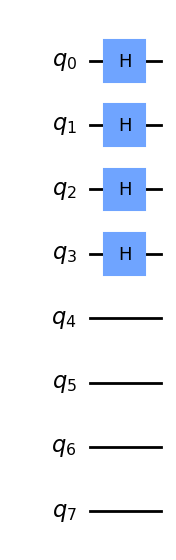

In [10]:
circuit.draw("mpl")

In [11]:
[circuit.cx(i, mean_qubits) for i in range(mean_qubits - 1)]

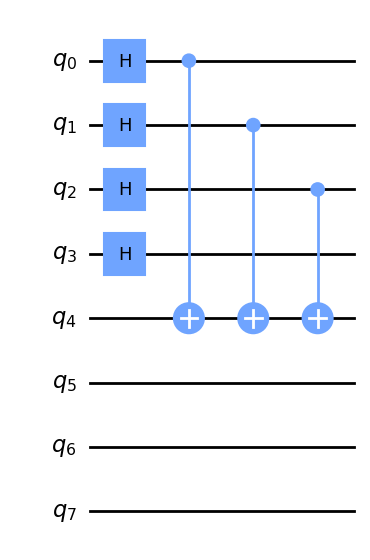

In [12]:
circuit.draw("mpl")

In [13]:
[circuit.cx(mean_qubits, i) for i in range(mean_qubits + 1, num_qubits)]

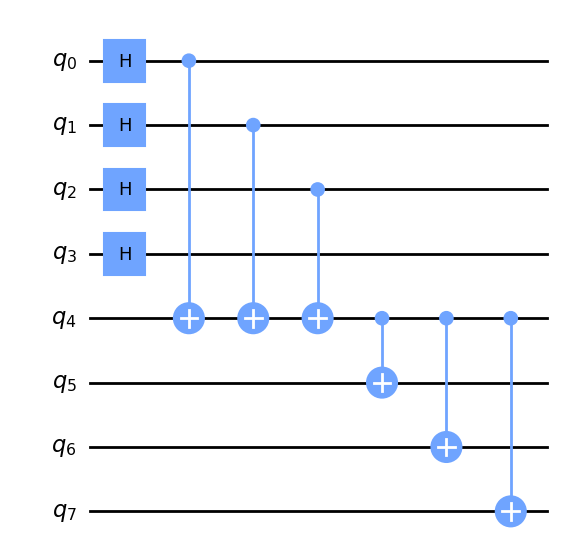

In [14]:
circuit.draw("mpl")

In [15]:
[circuit.cx(i, 5) for i in range(2, min(4, num_qubits))]

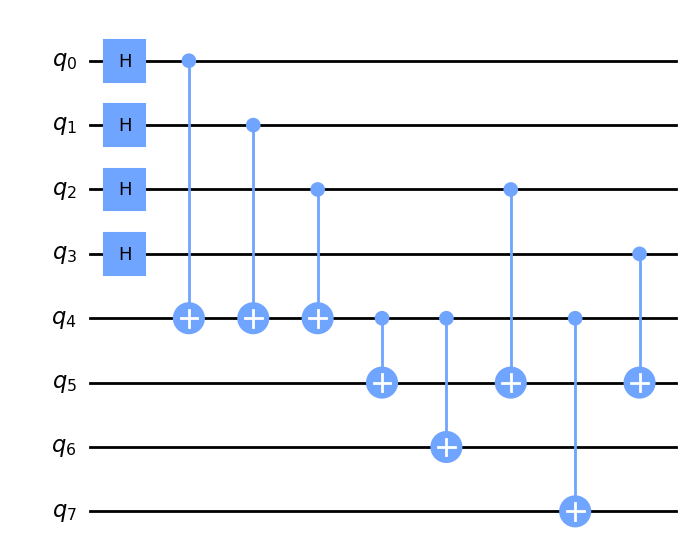

In [16]:
circuit.draw("mpl")

In [17]:
[circuit.cx(5, i) for i in range(6, min(8, num_qubits))]

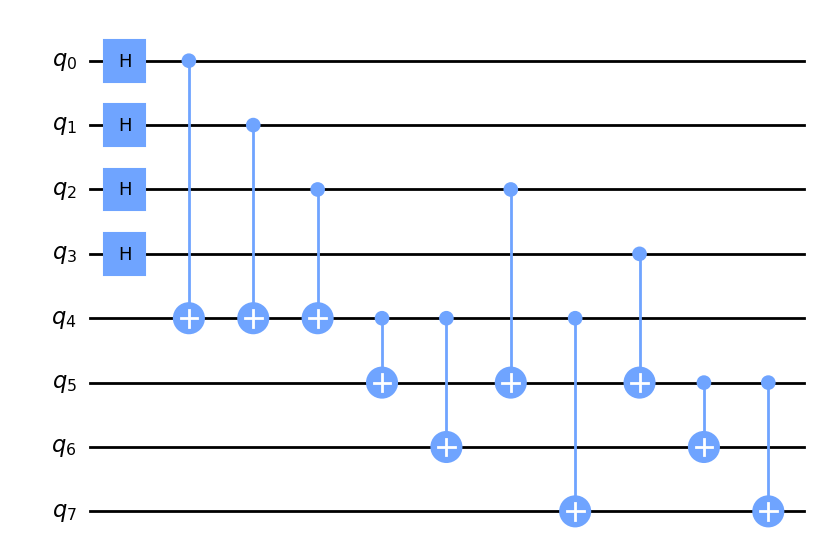

In [18]:
circuit.draw("mpl")

In [19]:
if num_qubits > 6:
    circuit.cx(3, 6)

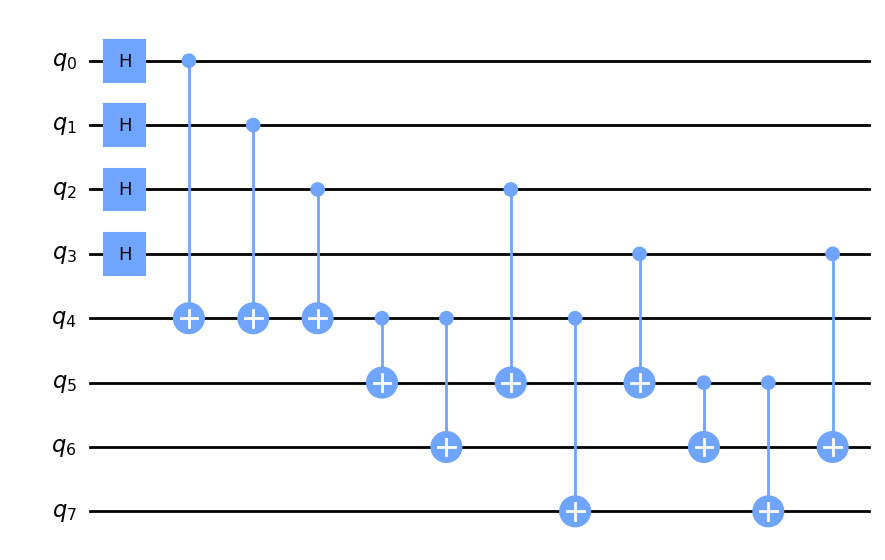

In [20]:
circuit.draw("mpl")

In [21]:
if num_qubits > 7:
    circuit.cx(6, 7)

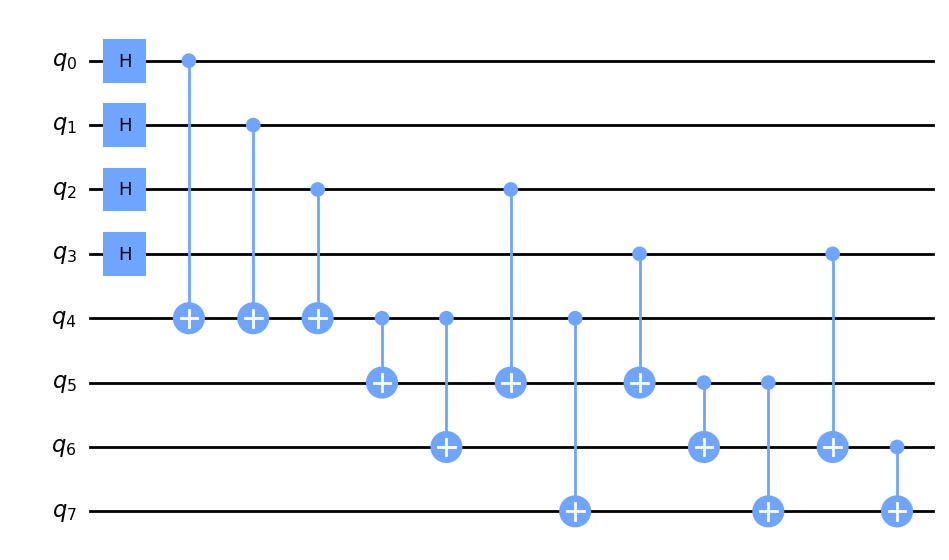

In [22]:
circuit.draw("mpl")

# Display the results


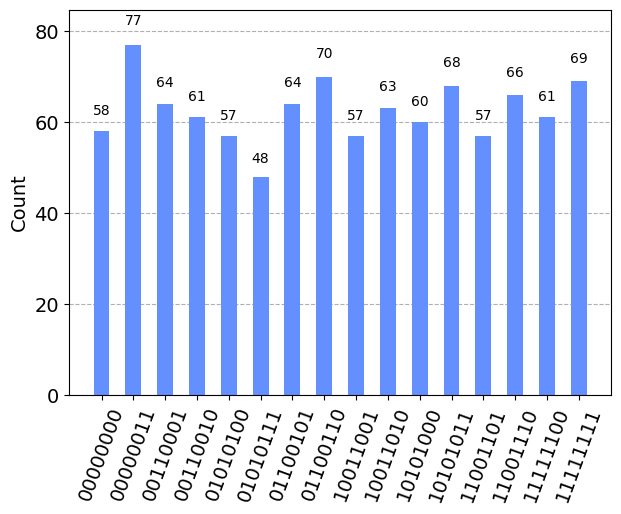

In [23]:
measure_circuit = QuantumCircuit(num_qubits, num_qubits)
measure_circuit.measure(range(num_qubits), range(num_qubits))

backend = Aer.get_backend("qasm_simulator")
circuit = circuit.compose(measure_circuit)
result = backend.run(transpile(circuit, backend), shots=1000).result()
count = result.get_counts()
plot_histogram(count)